In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('data_q4_2.csv')
df

,gender,age
0,Male,67.0
1,Female,61.0
2,Male,80.0
3,Female,49.0
4,Female,79.0
...,...,...
244,Male,57.0
245,Female,14.0
246,Female,75.0
247,Male,71.0


In [15]:
df = pd.read_csv('data_q4_2.csv')
df_numpy = df.to_numpy()
D_male = []
D_female = []
n = 1000
for i in range(df_numpy.shape[0]):
    if df_numpy[i][0] == 'Male':
        D_male.append(df_numpy[i][1])
    else:
        D_female.append(df_numpy[i][1])

data = df_numpy[:,1]
T_obs = abs(np.asarray(D_female).mean() - np.asarray(D_male).mean())
split = len(D_male)
n = 1000
c = 0.05
temp_set = data.copy()
sum_of_mean_diff = 0
for i in range(n):
    np.random.seed(i)
    np.random.shuffle(temp_set)
    D1_temp = temp_set[:split]
    D2_temp = temp_set[split:]
    D1_temp_mean = D1_temp.mean()
    D2_temp_mean = D2_temp.mean()
    T_i = abs(D2_temp_mean - D1_temp_mean)
    if T_i > T_obs:
        sum_of_mean_diff += 1
p_value = sum_of_mean_diff/n
print("p-value = ", p_value)
if p_value<=c:
    print("Reject H_0")
    print("Female patients do not get a stroke at the same age as male patients")
else:
    print("Accept H_0")
    print("Female patients get a stroke at the same age as male patients")

p-value =  0.404
Accept H_0
Female patients get a stroke at the same age as male patients


p-value =  0.404
Accept H_0
Female patients get a stroke at the same age as male patients
0.05673758865248227
0.06501182033096926
0.105397951142632
0.11308116627265563
0.11800630417651693
Maximum distance:  0.11800630417651693
Age at maximum distance:  56.0


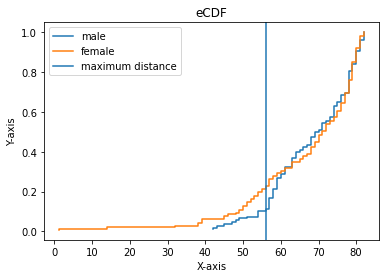

Accept H_0
Female patients get a stroke at the same age as male patients


In [24]:
df = pd.read_csv('data_q4_2.csv')
df_numpy = df.to_numpy()

D_male = []
D_female = []
n = 1000
for i in range(df_numpy.shape[0]):
    if df_numpy[i][0] == 'Male':
        D_male.append(df_numpy[i][1])
    else:
        D_female.append(df_numpy[i][1])
data = df_numpy[:,1]
T_obs = abs(np.asarray(D_female).mean() - np.asarray(D_male).mean())
split = len(D_male)
n = 1000
c = 0.05
temp_set = data.copy()
sum_of_mean_diff = 0
for i in range(n):
    np.random.seed(i)
    np.random.shuffle(temp_set)
    D1_temp = temp_set[:split]
    D2_temp = temp_set[split:]
    D1_temp_mean = D1_temp.mean()
    D2_temp_mean = D2_temp.mean()
    T_i = abs(D2_temp_mean - D1_temp_mean)
    if T_i > T_obs:
        sum_of_mean_diff += 1
p_value = sum_of_mean_diff/n
print("p-value = ", p_value)
if p_value<=c:
    print("Reject H_0")
    print("Female patients do not get a stroke at the same age as male patients")
else:
    print("Accept H_0")
    print("Female patients get a stroke at the same age as male patients")

D_male = np.asarray(D_male)
D_female = np.asarray(D_female)

### Question 4c ###
sort_male = np.sort(D_male)
sort_female = np.sort(D_female)
prob = 1/sort_male.shape[0]
CDF_D_male = [(i*prob) for i in range(1, sort_male.shape[0]+1)]
prob = 1/sort_female.shape[0]
CDF_D_female = [(i*prob)for i in range(1, sort_female.shape[0]+1)]

j = 0
k = 0
max_distance = -1

max_x = -1
f_female_low = []
f_female_high = []
f_male_low = []
f_male_high = []
diff_low = []
diff_high = []
max_diff = []

for i in range(sort_male.shape[0]):
    if i == 0:
        f_male_low.append(0)
        while(sort_female[j]<sort_male[i]):
            j += 1
        j -= 1
        f_female_low.append(CDF_D_female[j])
    else:
        f_male_low.append(CDF_D_male[i-1])
        while(sort_female[j]<sort_male[i]):
            j += 1
        j -= 1
        f_female_low.append(CDF_D_female[j])
    diff_low.append(abs(f_male_low[-1] - f_female_low[-1]))
              
    if i == sort_male.shape[0]-1:
        f_male_high.append(1)
        while(sort_female[k]<sort_male[i]):
            k += 1
        f_female_high.append(CDF_D_female[k])
    else:
        f_male_high.append(CDF_D_male[i+1])
        while(sort_female[k]<sort_male[i]):
            k += 1
        f_female_high.append(CDF_D_female[k])
    diff_high.append(abs(f_male_high[-1] - f_female_high[-1]))
    
    max_distance < max(diff_high[-1],diff_low[-1])
    if max_distance < max(diff_high[-1],diff_low[-1]):
        if max(diff_high[-1],diff_low[-1]) !=1:
            max_distance = max(diff_high[-1],diff_low[-1])
        max_x = sort_female[j]
        print(max_distance)
print("Maximum distance: ", max_distance)
print("Age at maximum distance: ",max_x)

y_1 = CDF_D_male
x_1 = sort_male
y_2 = CDF_D_female
x_2 = sort_female
t = "eCDF"
plt.title(t)
plt.step(x_1,y_1,label="male")
plt.step(x_2, y_2,label="female")
plt.axvline(max_x, 0, 1, label='maximum distance')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="upper left")
plt.show()

if max_distance<=c:
    print("Reject H_0")
    print("Female patients do not get a stroke at the same age as male patients")
else:
    print("Accept H_0")
    print("Female patients get a stroke at the same age as male patients")


In [10]:
def two_sample_KS(state1, state2):
    c = 0.05
    sort_state1 = np.sort(state1)
    sort_state2 = np.sort(state2)
    prob = 1/sort_state1.shape[0]
    CDF_state1 = [(i*prob) for i in range(1, sort_state1.shape[0]+1)]
    prob = 1/sort_state2.shape[0]
    CDF_state2 = [(i*prob)for i in range(1, sort_state2.shape[0]+1)]

    j = 0
    k = 0
    max_distance = -1
    max_x = -1

    f_state1_low = []
    f_state1_high = []
    f_state2_low = []
    f_state2_high = []
    diff_low = []
    diff_high = []
    max_diff = []

    for i in range(sort_state1.shape[0]):
        if i == 0:
            f_state1_low.append(0)
            while(sort_state2[j]<sort_state1[i]):
                j += 1
            j -= 1
            f_state2_low.append(CDF_state2[j])
        else:
            f_state1_low.append(CDF_state1[i-1])
            while(sort_state2[j]<sort_state1[i]):
                j += 1
            j -= 1
            f_state2_low.append(CDF_state2[j])
        diff_low.append(abs(f_state1_low[-1] - f_state2_low[-1]))

        if i == sort_state1.shape[0]-1:
            f_state1_high.append(1)
            while(sort_state2[k]<sort_state1[i]):
                k += 1
            f_state2_high.append(CDF_state2[k])
        else:
            f_state1_high.append(CDF_state1[i+1])
            while(sort_state2[k]<sort_state1[i]):
                k += 1
            f_state2_high.append(CDF_state2[k])
        diff_high.append(abs(f_state1_high[-1] - f_state2_high[-1]))

        if max_distance < max(diff_high[-1],diff_low[-1]):
            max_distance = max(diff_high[-1],diff_low[-1])
            max_x = sort_state2[j]
    print("Maximum distance: ", max_distance)
    print("Age at maximum distance: ",max_x)

    y_1 = CDF_state1
    x_1 = sort_state1
    y_2 = CDF_state2
    x_2 = sort_state2
    t = "eCDF"
    plt.title(t)
    plt.step(x_1,y_1,label="State 1")
    plt.step(x_2, y_2,label="State 2")
    plt.axvline(max_x, 0, 1, label='maximum distance')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc="upper right")
    plt.show()

    if max_distance>=c:
        print("Reject H_0")
        print("State 1 doesn't have same distribution as State 2")
    else:
        print("Accept H_0")
        print("State 1 have same distribution as State 2")

Maximum distance:  0.11800630417651693
Age at maximum distance:  56.0


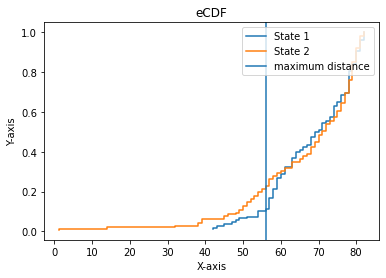

Reject H_0
State 1 doesn't have same distribution as State 2


In [11]:
two_sample_KS(D_male, D_female)

In [ ]:
def two_sample_KS(state1, state2):
    c = 0.05
    sort_state1 = np.sort(state1)
    sort_state2 = np.sort(state2)
    prob = 1/sort_state1.shape[0]
    CDF_state1 = [(i*prob) for i in range(1, sort_state1.shape[0]+1)]
    prob = 1/sort_state2.shape[0]
    CDF_state2 = [(i*prob)for i in range(1, sort_state2.shape[0]+1)]

    j = 0
    k = 0
    max_distance = -1
    max_x = -1

    f_state1_low = []
    f_state1_high = []
    f_state2_low = []
    f_state2_high = []
    diff_low = []
    diff_high = []
    max_diff = []

    for i in range(sort_state1.shape[0]):
        if i == 0:
            f_state1_low.append(0)
            while(sort_state2[j]<sort_state1[i]):
                j += 1
            j -= 1
            f_state2_low.append(CDF_state2[j])
        else:
            f_state1_low.append(CDF_state1[i-1])
            while(sort_state2[j]<sort_state1[i]):
                j += 1
            j -= 1
            f_state2_low.append(CDF_state2[j])
        diff_low.append(abs(f_state1_low[-1] - f_state2_low[-1]))

        if i == sort_state1.shape[0]-1:
            f_state1_high.append(1)
            while(sort_state2[k]<sort_state1[i]):
                k += 1
            f_state2_high.append(CDF_state2[k])
        else:
            f_state1_high.append(CDF_state1[i+1])
            while(sort_state2[k]<sort_state1[i]):
                k += 1
            f_state2_high.append(CDF_state2[k])
        diff_high.append(abs(f_state1_high[-1] - f_state2_high[-1]))

        if max_distance < max(diff_high[-1],diff_low[-1]):
            max_distance = max(diff_high[-1],diff_low[-1])
            max_x = sort_state2[j]
    print("Maximum distance: ", max_distance)
    print("Value at maximum distance: ",max_x)

    y_1 = CDF_state1
    x_1 = sort_state1
    y_2 = CDF_state2
    x_2 = sort_state2
    t = "eCDF"
    plt.title(t)
    plt.step(x_1,y_1,label="State 1")
    plt.step(x_2, y_2,label="State 2")
    plt.axvline(max_x, 0, 1, label='maximum distance')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc="upper right")
    plt.show()

    if max_distance>=c:
        print("Reject H_0")
    else:
        print("Accept H_0")